# Выявление факторов успешности компьютерных игр

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-анализа-и-исходные-данные" data-toc-modified-id="Цель-анализа-и-исходные-данные-1">Цель анализа и исходные данные</a></span></li><li><span><a href="#Шаг-1.-Изучение-общей-информации-по-данным" data-toc-modified-id="Шаг-1.-Изучение-общей-информации-по-данным-2">Шаг 1. Изучение общей информации по данным</a></span></li><li><span><a href="#Шаг-2.-Подготовка-данных" data-toc-modified-id="Шаг-2.-Подготовка-данных-3">Шаг 2. Подготовка данных</a></span></li><li><span><a href="#Шаг-3.-Анализ-данных" data-toc-modified-id="Шаг-3.-Анализ-данных-4">Шаг 3. Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выделение-значимого-периода" data-toc-modified-id="Выделение-значимого-периода-4.1">Выделение значимого периода</a></span></li><li><span><a href="#Продажи-по-платформам" data-toc-modified-id="Продажи-по-платформам-4.2">Продажи по платформам</a></span></li><li><span><a href="#Потенциально-прибыльные-платформы" data-toc-modified-id="Потенциально-прибыльные-платформы-4.3">Потенциально прибыльные платформы</a></span></li><li><span><a href="#Влияние-отзывов" data-toc-modified-id="Влияние-отзывов-4.4">Влияние отзывов</a></span></li><li><span><a href="#Влияние-жанров" data-toc-modified-id="Влияние-жанров-4.5">Влияние жанров</a></span></li><li><span><a href="#Потениально-популярные-продукты" data-toc-modified-id="Потениально-популярные-продукты-4.6">Потениально популярные продукты</a></span></li></ul></li><li><span><a href="#Шаг-4.-Портрет-пользователя-каждого-региона" data-toc-modified-id="Шаг-4.-Портрет-пользователя-каждого-региона-5">Шаг 4. Портрет пользователя каждого региона</a></span></li><li><span><a href="#Шаг-5.-Проверка-гипотез" data-toc-modified-id="Шаг-5.-Проверка-гипотез-6">Шаг 5. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№1" data-toc-modified-id="Гипотеза-№1-6.1">Гипотеза №1</a></span></li><li><span><a href="#Гипотеза-№2" data-toc-modified-id="Гипотеза-№2-6.2">Гипотеза №2</a></span></li></ul></li><li><span><a href="#Шаг-6.-Общий-вывод" data-toc-modified-id="Шаг-6.-Общий-вывод-7">Шаг 6. Общий вывод</a></span></li></ul></div>

<a id='Цель анализа'></a>
## Цель анализа и исходные данные

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. **Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

Перед нами данные до 2016 года, **кампания планируется на 2017-й.**
Данные хранятся в едином файле '/datasets/games.csv'. В себе он содержит, как общую информацию об играх, так и их рейтинг и количестве продаж.
 
*Для начала необходимо обработать пропуски, дубликаты и избавиться от портящих общую картину данных.
Далее провести исследовательский анализ, выявить закономерности. А также провести анализ и построить рейтинг регионов сбыта. И в конце, проверить средние пользовательские рейтинги (проверка нескольких гипотез).*

**Описание данных:**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.



<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера__

Отличное описание, выделены главные цели, прописаны основные шаги проекта, мне очень нравится
</div>


<a id='Шаг 1. Изучение общей информации по данным'></a>
## Шаг 1. Изучение общей информации по данным 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from scipy import stats as st
from scipy.stats import levene

In [73]:
games_data = pd.read_csv('/datasets/games.csv')
games_data.info()
print()
games_data.head()
top3_platform = ['PS4', 'XOne', '3DS']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



**По результатам предварительного просмотра данных, необходимо:**
1. Привести заголовки столбцов к единому виду (нижний регистр).
2. Удалить строки, где отсутсвует значение года выпуска. Так как эти данные необходимы для анализа, а пустых значений всего 269 (чуть более 1,5% от общего), то их можно не брать в расчет. Закономерностей в отсутствующих значениях строк не обнаружено.
3. Удалить строки, где отсутсвует название. Их всего 2, там же отсутствует и другая информация по жанру, рейтингам. Это удаление также не повлияет на общий результат.
4. В столбце User_Score обнаружено 2424 значений = *'tbd'*. Оно означает, что *Рейтинг еще неизвестен*. Так как нам не нужно учитывать этот параметр, заменим значение на NaN.
5. Изменить тип данных: Year_of_Release - int, User_Score - float (для удобства дальнейшего анализа).
6. Объеденить все пустые значения поля Rating в группу "No_rating" (для удобства группировки).


Наличие пропусков объяснимо отсутствием подобной информации в интернете, или же неполным описанием условий поиска и заполнения в программе, собирающей эти данные. Информация по различным рейтингам имеется в более половине данных, поэтому искусственное заполнение пустых значений будет некорректным. 
 
Одна и таже игра может выходить на разных платформах и в разные года, будем считать независимо друг от друга.


**Общая информация по рейтингам от ESRB:** *(столбец Rating)*
* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими.
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. 
* «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет.
* «T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет.
* «M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. 
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых.
* «RP» ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. 

<a id='Шаг 2. Подготовка данных'></a>
## Шаг 2. Подготовка данных

In [74]:
games_data.columns = games_data.columns.str.lower() # нижний регистр столбцов
games_data = games_data[(games_data['year_of_release'].isna()==False) & (games_data['name'].isna()==False)] # Удаление строк
games_data['user_score'].where(games_data['user_score'] !='tbd', None, inplace=True) # Замена значений tbd
games_data['year_of_release'] = games_data['year_of_release'].astype('int') # Изменение типа данных
games_data['rating'].where(games_data['rating'].isna()==False, 'no_rating', inplace=True) # Замена пустых значений 
games_data['user_score'] = games_data['user_score'].astype('float') # Изменение типа данных
games_data = games_data.drop_duplicates().reset_index(drop=True) # Удаление дубликатов (пока их нет)


# Суммарное кол-во продаж во всех регионах:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


По результатам предобработки данных количество строк сократилось с 16715 до 16444 (на ~1,6%), это допустимое изменение. А проведенное изменение типов теперь позволит корректно работать с цифрами.

<a id='Шаг 3. Анализ данных'></a>
## Шаг 3. Анализ данных

### Выделение значимого периода

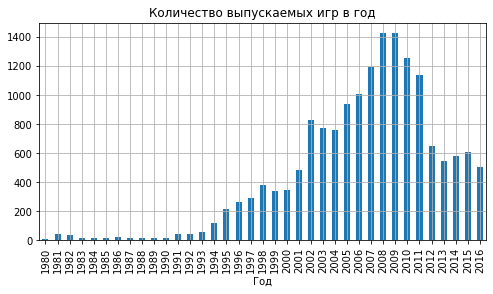

In [75]:
# Сколько игр выпускалось в разные годы?

count_games = games_data.pivot_table(index='year_of_release', values='name', aggfunc='count')
count_games.plot(kind='bar', figsize=(8,4), legend=False, grid=True) 
plt.title('Количество выпускаемых игр в год')
plt.xlabel('Год');

In [76]:
# Общие сведения за весь период
count_games.describe() 

,name
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


Представлены данные за 37 лет. Минимальное количество выпущенных в год игр - 9, среднее - 444, максимальное - 1427.
 
Игр в 2008-2009 года больше всего. До 1994г их крайне мало. Это логично можно объяснить отсутствием массовости, поскольку ПК и приставки были еще очень дороги для рядовых потребителей.
Также снижение наблюдается после пика 2009г, и *особенно резко с 2012г.* Одно из предположений - это связано с постепенным переходом пользователей на мобильные игры (нужно уточнять).

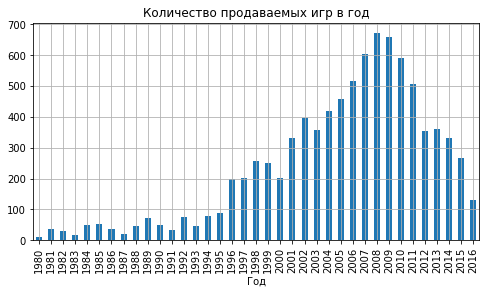

In [77]:
# Сколько игр продавалось в разные годы? На всех платформах
games_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(8,4),grid=True, legend=False) 
plt.title('Количество продаваемых игр в год')
plt.xlabel('Год');

Количество продаж имеет похожую динамику на ту, что выше. Пики также приходятся на 2008-2009гг. Однако первый наиболее заметный рост наблюдается с 1996г. 
 
Эти два графика показывают взаимную зависимость: чем больше игр - тем больше продаж. Поэтому спад наблюдается в аналогичных периодах - с 2012г. 
Но для прогноза будущих периодов наиболее интересным будет просмотр изменения **Среднего числа продаж каждой игры**.

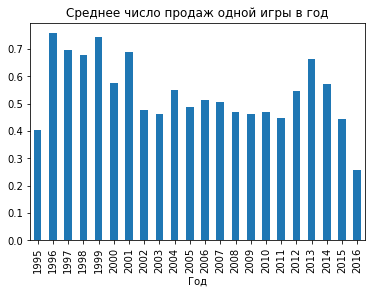

In [78]:
# Среднее число продаж одной игры для каждого года
# Данные в миллионах
mean_sales_games = games_data.pivot_table(index='year_of_release', values='total_sales', aggfunc=['sum', 'count'])
mean_sales_games.columns = ['sum', 'count']
mean_sales_games['mean'] = mean_sales_games['sum'] / mean_sales_games['count']
mean_sales_games
del mean_sales_games['sum']
del mean_sales_games['count']
mean_sales_games[mean_sales_games.index > 1994].plot(kind='bar', legend=False) # Рассматриваем период с 1994
plt.title('Среднее число продаж одной игры в год')
plt.xlabel('Год');

С 2002г наблюдается боковой тренд, далее рост к 2013г, после которого наступает спад. Этот год можно считать переломным, так как к 2015г продажи уже были равны 2011г, а в 2016 опустились еще ниже. (пока не берем в расчет возможную неполноту данных за 2016г)

* **Отталкиваясь от всего вышесказанного, считаем наиболее корректным для прогноза на 2017г смотреть данные за 2013-2016гг**. Поскольку мода и потребности меняются, и то, что было популярным 5-10 лет назад, с большей долей вероятности, уже не будет популярным в следущем году.
* Всего это 2233 строк от исходных 16715 (~13,4%).

In [79]:
# Фильтр на период с 2013г
games_since2013 = games_data[games_data['year_of_release']>=2013].reset_index(drop=True)

### Продажи по платформам

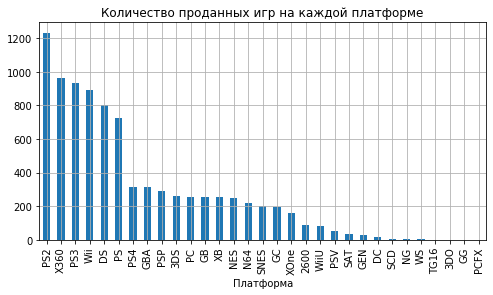

In [80]:
# Суммарные продажи по платформа
# Пока смотрим по всем данным
platform_sales = games_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
platform_sales.plot(kind='bar', figsize=(8,4), legend=False, grid=True) 
plt.title('Количество проданных игр на каждой платформе')
plt.xlabel('Платформа');

Заметная разница в продажах между 6 и 7 платформой. Поэтому для дальнейшего анализа возьмем первые 6.

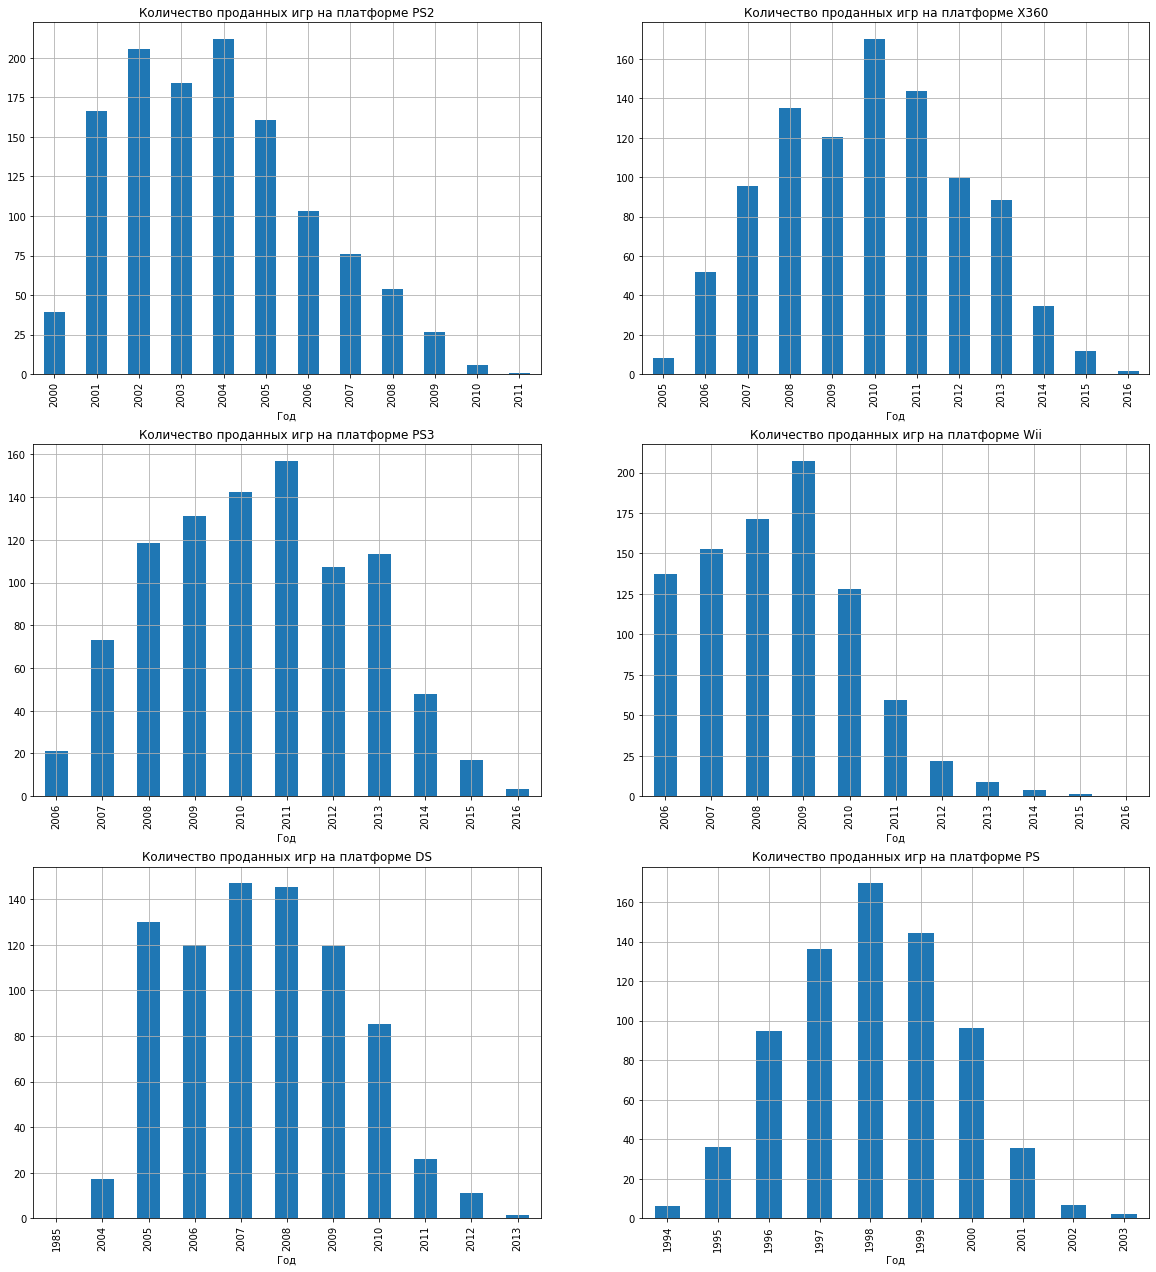

In [81]:
# Платформы с наибольшими суммарными продажами
platform_name = platform_sales.head(6).index
position = [{'x': 0, 'y': 0},
            {'x': 0, 'y': 1},
            {'x': 1, 'y': 0},
            {'x': 1, 'y': 1},
            {'x': 2, 'y': 0},
            {'x': 2, 'y': 1}]
i = 0
fig, axes = plt.subplots(3,2,figsize=(20,22))
for name in platform_name:
    top_platform = games_data[games_data['platform'] == name].groupby('year_of_release')['total_sales'].sum()
    top_platform.plot(kind='bar',  legend=False, grid=True, ax=axes[position[i]['x'],position[i]['y']]) 
    title = 'Количество проданных игр на платформе ' + name
    axes[position[i]['x'],position[i]['y']].set_title(title)
    axes[position[i]['x'],position[i]['y']].set_xlabel('Год')
    i += 1    


Только для 3 из 6 платформ с наибольшими суммарными продажами выпускались игры в 2014-2016гг. Для одной из которых (PS) последний год приходится вообще на 2003.
Большинство из графиков стремятся к нормальному распределению, со смещением в право или лево. Сначала платформа постепенно набирает популярность, **достигает пиковых значений за 4-5 лет** (расстояние первого года до пика) и **уходит с рынка примерно за 6-8 лет** (расстояние от пика до последнего года).
Пики продаж приходятся в основном на 2000-2010х. 

In [82]:
# За какой характерный срок появляются новые и исчезают старые платформы?
# Учтем, что если игры для опред-х платформ не выходили в каком-то промежуточном году, то платформа все равно существовала
# Для этого вопроса будем учитывать весь имеющийся период
platform_years = games_data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
platform_years.columns = ['min', 'max']
platform_years['ttl_years'] = platform_years['max'] - platform_years['min'] + 1 # с учетом текущего года
print('Топ 15 платформ по продолжительности существования')
print(platform_years.sort_values('ttl_years', ascending=False).head(10))

platform_years_mean = platform_years['ttl_years'].mean() # среднее
variance_years_platform = np.var(platform_years['ttl_years'], ddof=1) # дисперсия
standart_dev_platform = np.sqrt(variance_years_platform) # стандартное отклонение
# Применим правило 3 сигм, для поиска выбросов 
avg_platform = platform_years_mean + 3 * standart_dev_platform #  все, что выше является выбросом
platform_years_fltr = platform_years[(platform_years['ttl_years'] < avg_platform)]

print()
platform_mean_years = platform_years_fltr['ttl_years'].mean()
print('Средний срок существования платформы - {:.1f}'.format(platform_mean_years))
print('Количество платформ - {:.0f}'.format(platform_years_fltr['min'].count()))

Топ 15 платформ по продолжительности существования
           min   max  ttl_years
platform                       
PC        1985  2016         32
DS        1985  2013         29
GB        1988  2001         14
X360      2005  2016         12
PSP       2004  2015         12
PS2       2000  2011         12
NES       1983  1994         12
DC        1998  2008         11
Wii       2006  2016         11
PS3       2006  2016         11

Средний срок существования платформы - 7.8
Количество платформ - 30


**Средняя продолжительность жизни игровой платформы - 7,8 лет.**

Среди всех платформ наблюдается 2 долгожителя: PC - 32 года, DS - 29. При этом стоит отметить, что PC - это обычный персональный компьютер, он был с самого начала и, наверняка, никуда не денется. Поэтому, для исключения потенциальных выбросов используем правило 3 сигм, чтобы наиболее корректно расчитать среднее значение.

### Потенциально прибыльные платформы

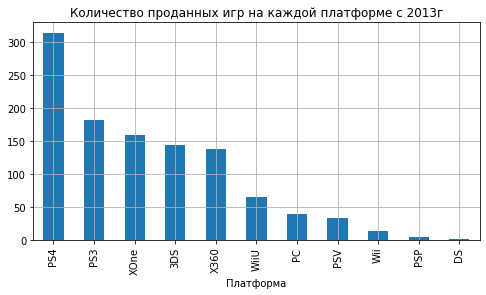

In [83]:
# Фильтр на актуальный период с 2013г
# Будем рассматривать только те платформы, для которых были игры за этот период
games_since2013 = games_data[games_data['year_of_release']>=2013].reset_index(drop=True)

platform_since2013 = games_since2013.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
platform_since2013.plot(kind='bar', figsize=(8,4), legend=False, grid=True) 
plt.title('Количество проданных игр на каждой платформе c 2013г')
plt.xlabel('Платформа');

Между 5 и 6 платформой есть резкое снижение количества продаж, поэтому из данного распределения легко можно выделить топ 5 игровых платформ, популярных с 2013 до 2016г.
 
**PS3, XOne, 3DS, X360 и самый популярный - PS4.** 
Стоит отметить, что в топ за весь период входят только 2 из них (X360 и PS3) и их продажи, как мы уже посмотрели выше, снижаются год от года. Необходимо посмотреть графики остальных.

Количество лет платформе
PS4 4
PS3 11
XOne 4
3DS 6
X360 12


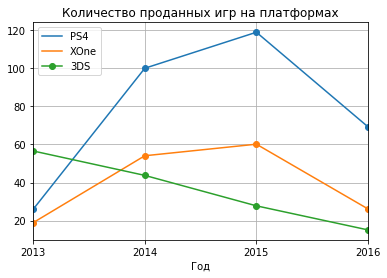

In [84]:
# Выделим топ 5 платформ с 2013г по 2016г
top5_platform = platform_since2013.head().index 

# Посчитаем время их существование и выделим самые молодые (младше среднего времени существования)
top3_platform = []
print('Количество лет платформе')
for each in top5_platform:
    years = platform_years[platform_years.index == each]['ttl_years'].sum()
    if years <= platform_mean_years:
        top3_platform.append(each)
    print(each, years)
    
# На оставим только наиболее молодые
for platform in top3_platform:
    top_platform = games_since2013[games_since2013['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    top_platform.plot(kind='line', legend=True, grid=True, style='-o', label=platform) 
    plt.legend = platform
    plt.xticks(top_platform.index)
    plt.title('Количество проданных игр на платформах')
    plt.xlabel('Год')


Исходя из средней продолжительности жизни платформы (7,8 лет) стоит не рассматривать в анализе те самые (X360 и PS3), они ее превышают.
А судя по понижательному тренду платформы 3DS, её мы тоже исключаем.
 
Остается 2 платфомы: **PS4 и XOne**. Мы не можем говорить с четкой уверенность, что они прошли свой пик продаж, как минимум потому, что данные за 2016 могут быть неполными. Делаем ставку на ним.

Количество проданных игр:
|Платформа  |    Cреднее|      Медиана|
|PS4        |       0.80|         0.20|
|XOne       |       0.65|         0.22|
|3DS        |       0.47|         0.09|


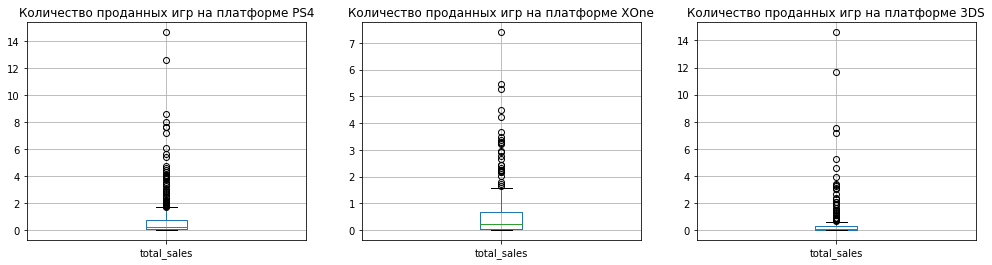

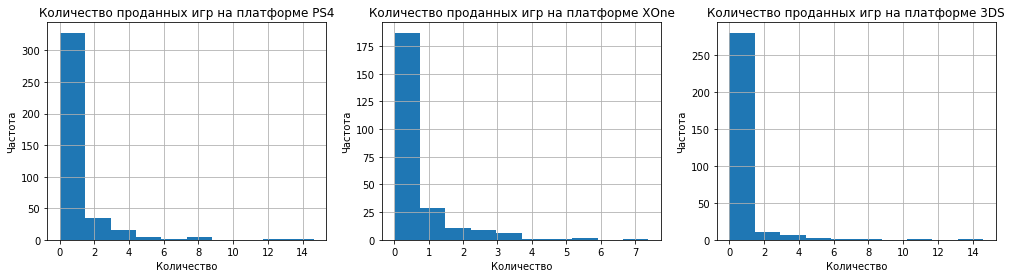

In [85]:
# Проверим, что выбранные 2 платформы точно отличаются от третьей
# Посмотрим для начала на диаграммы размаха
print('Количество проданных игр:')
print('|Платформа  |', '   Cреднее|', '     Медиана|')
i = 0
fig, axes = plt.subplots(1,3,figsize=(17,4))
fig, ax_plot = plt.subplots(1,3,figsize=(17,4))
for platform in top3_platform:
    top_platform = games_since2013[games_since2013['platform'] == platform]
    mean_platform = top_platform['total_sales'].mean()
    median_platform = top_platform['total_sales'].median()
    # Выведем общие данные в таблице
    print('|{: <10}'.format(platform), '|{: >11.2f}|'.format(mean_platform), '{: >12.2f}|'.format(median_platform))
    # Диаграмма размаха
    pd.DataFrame(top_platform['total_sales']).boxplot(ax=axes[i])
    title = 'Количество проданных игр на платформе ' + platform
    axes[i].set_title(title)
    # Частота значений
    top_platform['total_sales'].hist(ax=ax_plot[i])
    title = 'Количество проданных игр на платформе ' + platform
    ax_plot[i].set_title(title)
    ax_plot[i].set_xlabel('Количество')
    ax_plot[i].set_ylabel('Частота')
    i+=1
    

Ожидаемо, среднее значение продаж платформы PS4 выше остальных, что нельзя сказать о медиане, тут на первом месте XOne.
 
У всех 3х платформ значения Среднего и Медианы отличаются сильно. Превышение среднего над медианным значением говорит о скошенности распределения данных вправо, об этом говорят и графики с частотой появления значений. 

Чаще всего игры на платформах PS4 и 3DS покупают до 2млн раз, на XOne - до 1млн.

Но судя по диаграммам размаха, выбросов достаточно много во всех трех платформах. Возможно статистику могут портить какие-то очень популярные и скачиваемые игры. Проверим.

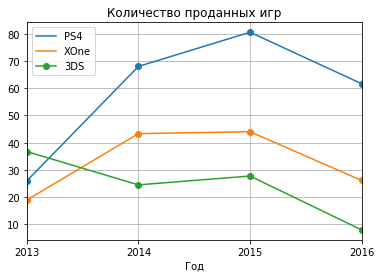

In [86]:
# Попробуем исключить выбросы и посмотреть динамику по годам
for platform in top3_platform:
    top_platform = games_since2013[games_since2013['platform'] == platform]
    mean_platform = top_platform['total_sales'].mean() # среднее по месяцам
    variance_platform = np.var(top_platform['total_sales'], ddof=1) # дисперсия
    standart_dev = np.sqrt(variance_platform) # стандартное отклонение
    # Применим правило 3 сигм, для поиска выбросов 
    avg_platform = mean_platform + 3 * standart_dev #  все, что выше является выбросом
    # Исключаем выбросы и значения равные 0, так как они не интересны для анализа выручки
    top_platform = top_platform[(top_platform['total_sales'] < avg_platform)]
    # Строим гистограмму 
    top_platform = top_platform.groupby('year_of_release')['total_sales'].sum()
    top_platform.plot(kind='line', legend=True, grid=True, style='-o', label=platform) 
    plt.legend = platform
    plt.xticks(top_platform.index)
    plt.title('Количество проданных игр')
    plt.xlabel('Год')
    i+=1

Даже после исключения экстремальных значений продаж той или иной игры, распределение остается преждним - платформы идут в том же порядке. **Основную ставку стоит сделать на PS4.**

### Влияние отзывов

Данные в разрезе платформы PS4

Коэффициент кореляции Пирсона:
Продажи и отзывов критиков - 0.41
Продажи и отзывов пользователей - -0.03


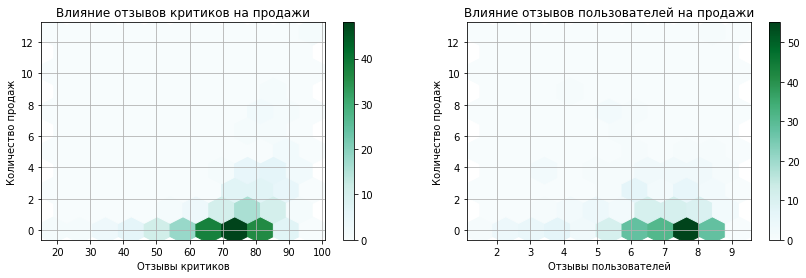

In [87]:
# Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков 

top1_platform = games_since2013[games_since2013['platform']==top3_platform[0]] # Только PS4

# Для числовой оценки взаимосвязи величин используем коэффициент Пирсона
print('Данные в разрезе платформы PS4')
print()
print('Коэффициент кореляции Пирсона:')
print('Продажи и отзывов критиков - {:.2f}'.format(top1_platform['total_sales'].corr(top1_platform['critic_score'])))
print('Продажи и отзывов пользователей - {:.2f}'.format(top1_platform['total_sales'].corr(top1_platform['user_score'])))

# Будем использовать диаграмму рассеяния (hexbin) для большей наглядности

fig, axes = plt.subplots(1,2,figsize=(14,4)) 
top1_platform.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=10, sharex=False, grid=True, ax=axes[0])
axes[0].set_title('Влияние отзывов критиков на продажи')
axes[0].set_xlabel('Отзывы критиков')
axes[0].set_ylabel('Количество продаж');

top1_platform.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=10, sharex=False, grid=True, ax=axes[1])
axes[1].set_title('Влияние отзывов пользователей на продажи')
axes[1].set_xlabel('Отзывы пользователей')
axes[1].set_ylabel('Количество продаж');

Для платформы PS4:
**Наибольшее количество игр имеет пользовательский рейтинг ≈ 7-8, рейтинг критиков ≈ 60-85.** Также не стоит забывать, что игр с рейтингом меньше половины, значит стоит учесть и те, что без рейтинга, поскольку большая часит игр приходится на них.

Коэффициент Пирсона говорит о том, что при высоких рейтингах критиков растут и продажи (положительная корреляция). А вот отзывы пользователей почти не влияют на них.

Если эта азаимосвязь сохраняется на общих даных - возьмем во внимание только отзывы критиков.

Данные в разрезе платформы XOne

Коэффициент кореляции Пирсона:
Продажи и отзывов критиков - 0.42
Продажи и отзывов пользователей - -0.07


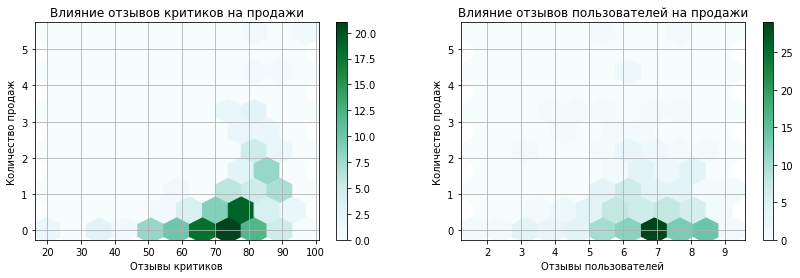

In [88]:
# Посмотрим, сохраняется ли эта зависимость на XOne

fig, axes = plt.subplots(1,2,figsize=(14,4)) 
top_platform = games_since2013[games_since2013['platform']==top3_platform[1]] # Только XOne

print('Данные в разрезе платформы XOne')
print()
# Для числовой оценки взаимосвязи величин используем коэффициент Пирсона
print('Коэффициент кореляции Пирсона:')
print('Продажи и отзывов критиков - {:.2f}'.format(top_platform['total_sales'].corr(top_platform['critic_score'])))
print('Продажи и отзывов пользователей - {:.2f}'.format(top_platform['total_sales'].corr(top_platform['user_score'])))

# Будем использовать диаграмму рассеяния (hexbin) для большей наглядности


top_platform.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=10, sharex=False, grid=True, ax=axes[0])
axes[0].set_title('Влияние отзывов критиков на продажи')
axes[0].set_xlabel('Отзывы критиков')
axes[0].set_ylabel('Количество продаж');

top_platform.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=10, sharex=False, grid=True, ax=axes[1])
axes[1].set_title('Влияние отзывов пользователей на продажи')
axes[1].set_xlabel('Отзывы пользователей')
axes[1].set_ylabel('Количество продаж');


Для платформы XOne роявляется аналогичная PS4 зависимость от рейтигов.

Данные в разрезе платформы 3DS

Коэффициент кореляции Пирсона:
Продажи и отзывов критиков - 0.36
Продажи и отзывов пользователей - 0.24


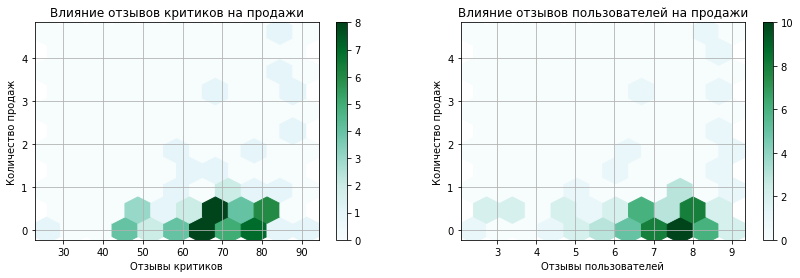

In [89]:
# Посмотрим, сохраняется ли эта зависимость на 3DS

fig, axes = plt.subplots(1,2,figsize=(14,4)) 
top_platform = games_since2013[games_since2013['platform']==top3_platform[2]] # Только XOne

print('Данные в разрезе платформы 3DS')
print()
# Для числовой оценки взаимосвязи величин используем коэффициент Пирсона
print('Коэффициент кореляции Пирсона:')
print('Продажи и отзывов критиков - {:.2f}'.format(top_platform['total_sales'].corr(top_platform['critic_score'])))
print('Продажи и отзывов пользователей - {:.2f}'.format(top_platform['total_sales'].corr(top_platform['user_score'])))

# Будем использовать диаграмму рассеяния (hexbin) для большей наглядности


top_platform.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=10, sharex=False, grid=True, ax=axes[0])
axes[0].set_title('Влияние отзывов критиков на продажи')
axes[0].set_xlabel('Отзывы критиков')
axes[0].set_ylabel('Количество продаж');

top_platform.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=10, sharex=False, grid=True, ax=axes[1])
axes[1].set_title('Влияние отзывов пользователей на продажи')
axes[1].set_xlabel('Отзывы пользователей')
axes[1].set_ylabel('Количество продаж');


А вот для платформы 3DS обнаружена зависимость от рейтинга пользователей. Это вероятно можно объяснить спецификой того региона, где она популярна.

Для общих данных будем учитывать **отзывы критиков, оказывающие наибольшее влияние на продажи**, с диапазоном 60-85.

### Влияние жанров

In [90]:
# Посмотрим продажи в разбивке по жанрам
# Паралелльно избавимся от выбросов, чтобы какие-то единичные игры не перетягивали значение жанров

genre_name = games_since2013['genre'].unique()
top_genres = []
for name in genre_name:
    genres = games_since2013[games_since2013['genre'] == name]
    mean_genre = genres['total_sales'].mean() # среднее по месяцам
    variance_genre = np.var(genres['total_sales'], ddof=1) # дисперсия
    standart_dev = np.sqrt(variance_genre) # стандартное отклонение
    # Применим правило 3 сигм, для поиска выбросов 
    avg_genre = mean_genre + 3 * standart_dev #  все, что выше является выбросом
    # Исключаем выбросы и значения равные 0, так как они не интересны для анализа выручки
    genres = genres[(genres['total_sales'] < avg_genre)]
    # Добавим отфильтрованные значения в новую таблицу
    top_genres.append([genres['genre'].head(1).values[0], genres['total_sales'].sum(), genres['total_sales'].count(), genres['total_sales'].mean()])

top_genres = pd.DataFrame(top_genres)
top_genres.columns = ['genre', 'sum', 'count', 'mean']
top_genres = top_genres.sort_values('mean', ascending=False)
top_genres

,genre,sum,count,mean
1,Shooter,175.72,181,0.970829
4,Sports,121.93,210,0.580619
8,Platform,35.10,72,0.487500
6,Racing,32.80,84,0.390476
2,Role-Playing,105.30,288,0.365625
0,Action,246.67,758,0.325422
5,Fighting,22.89,78,0.293462
3,Misc,40.47,151,0.268013
7,Simulation,10.44,59,0.176949
9,Strategy,7.29,54,0.135000


Жанр Action - самый популярный по количеству покупок, он же самый популярный по количеству игр.
Однако **среднее количество скачиваний у каждой игры больше всего в жанре - Shooter.** Этот параметр нам наиболее интересен. Поскольку если увеличить количество игр в данной категории, то продажи увеличатся кратно этому коэффициенту.
Стоит отметить, что 

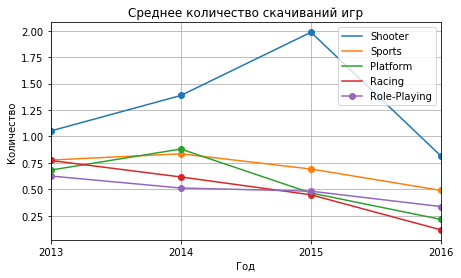

In [91]:
# Выведим 5 наиболее популярных жанров на графике по годам

top5_ganges = top_genres['genre'].head()
for name in top5_ganges:
    genres = games_since2013[games_since2013['genre'] == name]

    # Строим гистограмму 
    genres = genres.groupby('year_of_release')['total_sales'].mean()
    genres.plot(kind='line', legend=True, grid=True, marker='o', label=name, figsize=(7,4)) 
    plt.xticks(genres.index)
    plt.title('Среднее количество скачиваний игр')
    plt.xlabel('Год')
    plt.ylabel('Количество')

Исходя из этой динамики видно, что жанр Shooter давно уже на протяжени нескольких лет занимает лидирующюю позицию по количеству скачиваний, приходящихся на одну игру.

### Потениально популярные продукты

In [92]:
# Создадим сводную таблицу топовых игр, среди лучших платформ и лучших жанров

top_games = []
for platform in top3_platform:
    # Фильтр на лучшие платформы
    now_platform = games_since2013[(games_since2013['platform'] == platform)]
    platform_name = now_platform.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values('total_sales', ascending=False)
    platform_name.columns = ['mean_sales']
    # Топ 3 лучших жанров
    top3_genre = platform_name.head(3).index
    # Фильтр на лучшие жанры
    for genre in top3_genre: 
        # С условием на лучший рейтинг критиков или его остутствие                           
        game_name = (now_platform[(now_platform['genre']==genre)
                        & ((np.greater_equal(now_platform['critic_score'], 60)
                        & np.greater_equal(85, now_platform['critic_score'])) | (now_platform['critic_score'].isna()))]
                         .pivot_table(index='name', values=['total_sales', 'rating'], aggfunc={'total_sales':'sum', 'rating': 'first'})
                             .sort_values('total_sales', ascending=False))
        # Тип 5 лучших игр
        for name in game_name.head().index:
            # Запишем все данные в новую таблицу                       
            top_games.append((platform, genre, name, list(game_name[game_name.index==name]['rating'].head(1))[0], game_name[game_name.index==name]['total_sales'].sum()))
        
games_df = pd.DataFrame(top_games)
games_df.columns = ['platform', 'genre', 'game', 'rating', 'total_sales']

# Сводный результат
result = (games_df.pivot_table(index=['platform', 'genre', 'game', 'rating'], values='total_sales', aggfunc='sum')
              .sort_values(['platform', 'genre','total_sales'], ascending=False))
result

total_sales
platform genre        game                                               rating                
XOne     Sports       FIFA 16                                            E                 3.25
                      FIFA 17                                            E                 2.65
                      Madden NFL 16                                      E                 2.42
                      FIFA 15                                            E                 2.18
                      NBA 2K15                                           E                 1.73
         Shooter      Call of Duty: Black Ops 3                          no_rating         7.39
                      Call of Duty: Advanced Warfare                     M                 5.26
                      Halo 5: Guardians                                  T                 4.49
                      Star Wars Battlefront (2015)                       no_rating         3.66
                      Destiny                                            T                 3.37
         Role-Playing The Elder Scrolls Online                           M                 1.28
                      Dragon Age: Inquisition                            M                 0.93
                      The Elder Scrolls V: Skyrim                        no_rating         0.75
                      Diablo III                                         no_rating         0.66
                      Final Fantasy Type-0                               no_rating         0.25
PS4      Sports       FIFA 16                                            E                 8.58
                      FIFA 17                                            E                 7.60
                      FIFA 15                                            E                 6.08
                      Madden NFL 16                                      E                 3.24
                      NBA 2K15                                           E                 2.45
         Shooter      Call of Duty: Black Ops 3                          no_rating        14.63
                      Star Wars Battlefront (2015)                       no_rating         7.98
                      Call of Duty: Advanced Warfare                     M                 7.66
                      Destiny                                            T                 5.64
                      Call of Duty: Infinite Warfare                     M                 4.47
         Action       The Last of Us                                     no_rating         4.72
                      Watch Dogs                                         M                 4.05
                      Assassin's Creed: Unity                            M                 3.96
                      Assassin's Creed Syndicate                         M                 3.39
                      Middle-Earth: Shadow of Mordor                     M                 2.96
3DS      Simulation   Tomodachi Life                                     no_rating         5.22
                      Animal Crossing: Happy Home Designer               E                 3.05
                      Story of Seasons                                   E10+              0.42
                      Story of Seasons: Good Friends of the Three Vil... no_rating         0.20
                      Return to PopoloCrois: A Story of Seasons Fairy... E10+              0.16
         Role-Playing Pokemon X/Pokemon Y                                no_rating        14.60
                      Pokemon Omega Ruby/Pokemon Alpha Sapphire          no_rating        11.68
                      Pokemon Sun/Moon                                   no_rating         7.14
                      Monster Hunter 4                                   no_rating         3.44
                      Yokai Watch 2 Ganso/Honke                          no_rating         3.28
         Fighting     Super Smash Bros. for Wii U an

Из предыдущих этапов анализа, определяющие критерии успешности игры:
* Платформы PS4, XOne, 3DS
* Оценки критиков 60-85 (или их отсутствие)
* Также мы выделили топ3 жанра для кажой платформы, они в некоторых моментах отличаются от топа жанров по всем платформам, и топ5 игр по этим жанрам.

Выберем игры из этого списка в сооответствии с регионом.

<a id='Шаг 4. Портрет пользователя каждого региона'></a>
## Шаг 4. Портрет пользователя каждого региона

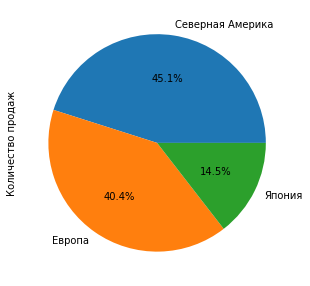

In [93]:
# Посмотрим, какую долю рынка занимает каждый регион
all_region = [games_since2013['na_sales'].sum(), games_since2013['eu_sales'].sum(), games_since2013['jp_sales'].sum()]
all_region = pd.DataFrame(all_region)

all_region.index = ['Северная Америка', 'Европа', 'Япония']
all_region.columns = ['Количество продаж']
all_region.plot(y='Количество продаж', kind='pie', figsize=(5,5),autopct='%1.1f%%', legend=False);

Получили ожидаемое распределение: первом месте - Северная Америка, на втором - Европа, на третьем - Япония.

Продажи в Северной Америке


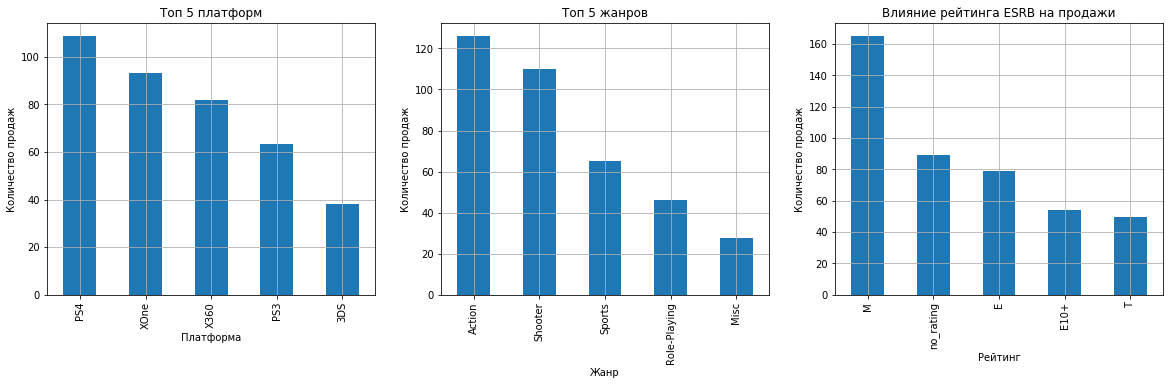

In [94]:
# продажи в Северной Америке 
print('Продажи в Северной Америке')
parameters =[{'group': 'platform', 'title':'Топ 5 платформ', 'xlabel': 'Платформа', 'ylabel': 'Количество продаж','loc_x': 0}, 
    {'group': 'genre', 'title': 'Топ 5 жанров', 'xlabel': 'Жанр', 'ylabel': 'Количество продаж','loc_x': 1}, 
    {'group': 'rating', 'title': 'Влияние рейтинга ESRB на продажи', 'xlabel': 'Рейтинг', 'ylabel': 'Количество продаж','loc_x': 2}]

na_game = []

fig, axes = plt.subplots(1,3,figsize=(20,5))
for param in parameters:
    hist_data = games_since2013.pivot_table(index=[param['group']], values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()
    hist_data.plot(kind='bar',grid=True, legend=False, ax=axes[param['loc_x']])
    axes[param['loc_x']].set_title(param['title'])
    axes[param['loc_x']].set_xlabel(param['xlabel'])
    axes[param['loc_x']].set_ylabel(param['ylabel'])
    na_game.append(list(hist_data.head(2).index))

Больше всего людей в Северной Америке пользуются PS4. Самые популярные жанры Action и Shooter с рейтингом M.

In [95]:
# Cписок потенциально популярных игр в следущем году для Северной Америки 
na_best_game = (result[(result.index.isin(na_game[0], level='platform')) 
       & (result.index.isin(na_game[1], level='genre')) 
       & (result.index.isin(na_game[2], level='rating'))])
na_best_game = na_best_game.sort_values('total_sales', ascending=False).head(5)
na_best_game

total_sales
platform genre   game                           rating                
PS4      Shooter Call of Duty: Black Ops 3      no_rating        14.63
                 Star Wars Battlefront (2015)   no_rating         7.98
                 Call of Duty: Advanced Warfare M                 7.66
XOne     Shooter Call of Duty: Black Ops 3      no_rating         7.39
                 Call of Duty: Advanced Warfare M                 5.26

Основное направление рекламы в Северной Америке в следущем году стоит сделать для пользователей PS4, игра - "Call of Duty: Black Ops 3", и далее по списку топ5 игр.

Продажи в Европе


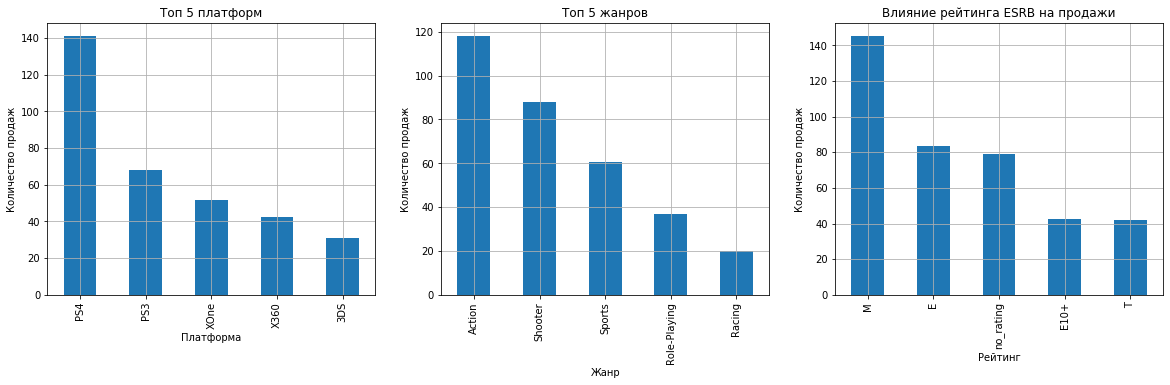

In [96]:
# продажи в Европе
print('Продажи в Европе')
eu_game = []
fig, axes = plt.subplots(1,3,figsize=(20,5))
for param in parameters:
    hist_data = games_since2013.pivot_table(index=[param['group']], values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()
    hist_data.plot(kind='bar',grid=True, legend=False, ax=axes[param['loc_x']])
    axes[param['loc_x']].set_title(param['title'])
    axes[param['loc_x']].set_xlabel(param['xlabel'])
    axes[param['loc_x']].set_ylabel(param['ylabel'])
    eu_game.append(list(hist_data.head(2).index))

В Европе ситуация аналогична Северной Америке - Больше всего людей имеют плалтформы PS4. Самые популярные жанры Action и Shooter с рейтингом M.

In [97]:
# Cписок потенциально популярных игр в следущем году для Европы 
eu_best_game = (result[(result.index.isin(eu_game[0], level='platform')) 
       & (result.index.isin(eu_game[1], level='genre')) 
       & (result.index.isin(eu_game[2], level='rating'))])
eu_best_game = eu_best_game.sort_values('total_sales', ascending=False).head(5)
eu_best_game

total_sales
platform genre   game                           rating             
PS4      Shooter Call of Duty: Advanced Warfare M              7.66
                 Call of Duty: Infinite Warfare M              4.47
         Action  Watch Dogs                     M              4.05
                 Assassin's Creed: Unity        M              3.96
                 Assassin's Creed Syndicate     M              3.39

Основное направление рекламы в Европе в следущем году стоит сделать для пользователей PS4, игра - "Call of Duty: Advanced Warfare", и далее по списку топ5 игр.

Продажи в Японии


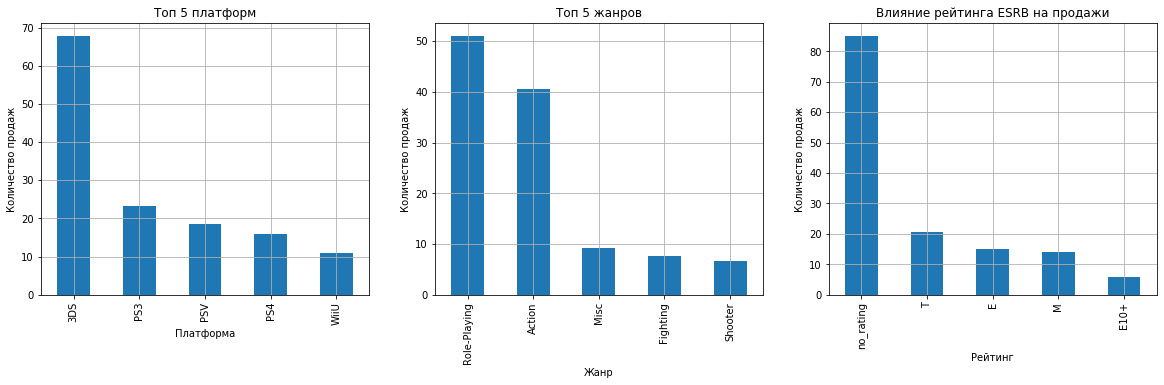

In [98]:
# продажи в Японии 
print('Продажи в Японии')
jp_game = []
fig, axes = plt.subplots(1,3,figsize=(20,5))
for param in parameters:
    hist_data = games_since2013.pivot_table(index=[param['group']], values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()
    hist_data.plot(kind='bar',grid=True, legend=False, ax=axes[param['loc_x']])
    axes[param['loc_x']].set_title(param['title'])
    axes[param['loc_x']].set_xlabel(param['xlabel'])
    axes[param['loc_x']].set_ylabel(param['ylabel'])
    jp_game.append(list(hist_data.head(2).index))

Япония отличается от предыдущих направлений продаж - больше всего людей пользуются 3DS. Самые популярные жанры Role-Playing и Action, игры в большинстве случаев без рейтинга.

In [99]:
# Cписок потенциально популярных игр в следущем году для Японии 
jp_best_game = (result[(result.index.isin(jp_game[0], level='platform')) 
       & (result.index.isin(jp_game[1], level='genre')) 
       & (result.index.isin(jp_game[2], level='rating'))])
jp_best_game = jp_best_game.sort_values('total_sales', ascending=False).head(5)
jp_best_game

total_sales
platform genre        game                                      rating                
3DS      Role-Playing Pokemon X/Pokemon Y                       no_rating        14.60
                      Pokemon Omega Ruby/Pokemon Alpha Sapphire no_rating        11.68
                      Pokemon Sun/Moon                          no_rating         7.14
                      Monster Hunter 4                          no_rating         3.44
                      Yokai Watch 2 Ganso/Honke                 no_rating         3.28

Основное направление рекламы в Японии в следущем году стоит сделать для пользователей 3DS, игры - "Pokemon X/Pokemon Y", и далее по списку топ5 игр.

Судя по общей выручке с топ5 популярных игр в каждом регионе, самым перспективным направлением остается Северная Америка, а вот Япония в плане потенциального дохода оказалась намного привлекательнее Европы. Поскольку, несмотря на  то, что в Европе больше игр, таких популярных, как в Японии нет.

<a id='Шаг 5. Проверка гипотез'></a>
## Шаг 5. Проверка гипотез

В запершении анализа, необходимо проверить две, поставленные нам, гипотезы.

<a id='Гипотеза №1'></a>
### Гипотеза №1

Выдвигаем гипотезу, что **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**  - это будет нулевая гипотеза H₀ (так как H₀ всегда формулируется так, чтобы использовать знак равенства). 
 
Противоположная ей, альтернативная гипотеза H1 - это **Средние пользовательские рейтинги платформ Xbox One и PC различается**

In [100]:
# Зададим критический уровень статистической значимости
alpha = 0.05 

# для корректного расчета коэф-тов, берем только те данные, где есть рейтинг
XOne = games_since2013[(games_since2013['platform'] == 'XOne') & (games_since2013['user_score'].isna() == False)] #182строки
PC = games_since2013[(games_since2013['platform'] == 'PC') & (games_since2013['user_score'].isna() == False)] #155строк
# Тест Левена проверяет нулевую гипотезу о том, что все входные выборки взяты с равными дисперсиями.
# если они отличаются меньше, чем на 5%, equal_var=True.
stats, p = levene(XOne['user_score'], PC['user_score'])
if  p < alpha:
    print("Дисперсии генеральных совокупностей равны")
else:
    print("Дисперсии генеральных совокупностей не равны")

print()
# Проверяем гипотезу о равенстве средних двух генеральных совокупностей. Гипотеза двусторонняя 
result_1 = st.ttest_ind(XOne['user_score'], PC['user_score'], equal_var=True)
print('p-значение: ', result_1.pvalue)

# если p-value окажется меньше alpha - отвергнем гипотезу
if (result_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсии генеральных совокупностей равны

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние рейтинги для двух платформ одинаковы, и всего лишь с вероятностью в почти 14% такое или большее различие можно получить случайно.
На данном этапе принимаем нулевую гипотезу - **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

<a id='Гипотеза №2'></a>
### Гипотеза №2

Выдвигаем гипотезу, что **Средние пользовательские рейтинги жанров Action и Sports одинаковые**  - это будет нулевая гипотеза H₀ (так как H₀ всегда формулируется так, чтобы использовать знак равенства). 
 
Противоположная ей, альтернативная гипотеза H1 - это **Средние пользовательские рейтинги жанров Action и Sports  разные (НЕ равны)**

In [101]:
# для корректного расчета коэф-тов, берем только те данные, где есть рейтинг

Action = games_since2013[(games_since2013['genre'] == 'Action') & (games_since2013['user_score'].isna() == False)]# 389строк

Sports = games_since2013[(games_since2013['genre'] == 'Sports') & (games_since2013['user_score'].isna() == False)]# 160строк
# Тест Левена проверяет нулевую гипотезу о том, что все входные выборки взяты с равными дисперсиями.
# если они отличаются меньше, чем на 5%, equal_var=True.
stats, p = levene(Action['user_score'], Sports['user_score'])
if  p < alpha:
    print("Дисперсии генеральных совокупностей равны")
else:
    print("Дисперсии генеральных совокупностей не равны")

print()
# Проверяем гипотезу о равенстве средних двух генеральных совокупностей. Гипотеза двусторонняя 
result_2 = st.ttest_ind(Action['user_score'], Sports['user_score'], equal_var=True) 
print('p-значение: ', result_1.pvalue)

# если p-value окажется меньше alpha - отвергнем гипотезу
if (result_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


Дисперсии генеральных совокупностей равны

p-значение:  0.14012658403611647
Отвергаем нулевую гипотезу


Полученное значение p-value достаточно маленькое, чтобы говорить о том, что рейтинги могут быть одинаковы. Это может случиться только с вероятностью 14,7%.  Отвергаем (но не опровергаем) нулевую гипотезу в пользу альтернативной - **Средние пользовательские рейтинги жанров Action и Sports разные**

<a id='Шаг 6. Общий вывод'></a>
## Шаг 6. Общий вывод

Для прогнозирования продаж следующего года был проанализирован период с 2013 по 2016г.

* Выделены наиболее перспективные платформы: XOne, 3DS и самый популярный - PS4.
Они отличаются по регионам, в Европе и Северной Америке наибольшее количество пользователей приходится на платформу PS4. В Японии на 3DS. Средняя продолжительность "жизни" платформ - 7,8 лет.

* Выделены наиболее перспективные жанры: Shooter, Sports, Platform, Racing, Role-Playing.
Они также отличаются по регионам, в Европе и Северной Америке больше всего игр приходится на жанры Action и Shooter. Первый из которых (как мы выяснили) выбивается количеством игр. А вот в Shooter на одну игру приходится больше продаж, поэтому этот жанр для рекламы предпочтительнее.
В Японии самый популярный жанр Role-Playing, он же входит в топ 5 жанров по общей выборке.

* Только в части данных имеется рейтинги игра. Выявлено, что вот рейтинг критиков имеет прямую корреляцию. Наиболее интересный диапазон - 65-85. А вот пользовательский рейтинг немного важен только для платформы 3DS (а это Япония).

* Большую долю рынка занимает Северная Америка, меньшую - Япония.
Однако Япония потенциально является более перспективным рынком, чем Европа, судя по выручке от самых популярных игр (в Японии она намного больше).


**Выделены топ5 потенциально перспективных игр для каждого региона на 2017г**

Основную ставку **в Северной Америке** советуем сделать на:
платформу PS4:
- Call of Duty: Black Ops 3
- Star Wars Battlefront (2015)
- Call of Duty: Advanced Warfare	
платформу XOne:
- Call of Duty: Black Ops 3
- Call of Duty: Advanced Warfare	

Основную ставку **в Японии** советуем сделать на:
платформу 3DS:
- Pokemon X/Pokemon Y	
- Pokemon Omega Ruby/Pokemon Alpha Sapphire
- Pokemon Sun/Moon
- Monster Hunter 4
- Yokai Watch 2 Ganso/Honke

Основную ставку **в Европе** советуем сделать на:
платформу PS4:
- Shooter	Call of Duty: Advanced Warfare
- Call of Duty: Infinite Warfare
- Watch Dogs
- Assassin's Creed: Unity	M
- Assassin's Creed Syndicate

* Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" **подтверждена**.
* Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" **подтверждена**.